In [1]:
import numpy as np
import copy
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
import pandas as pd
import sys 
import h5py 
sys.path.append("../lib")
from figparams import *
plt.rcParams.update(rc_params)
from utils import *

In [2]:
df = pd.read_hdf("../data/LISALowFreqPSD.h5")
log_f = df['logFrequency'].values
psdLISA = df['PSD'].values

/home/riccardo/Software/anaconda3/envs/blgsuite/lib/python3.11/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


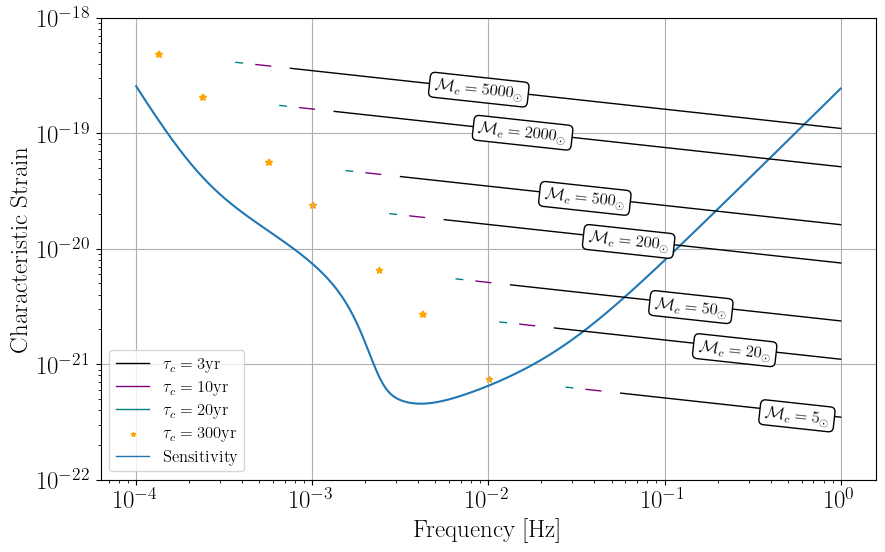

In [3]:
MCDf = [5, 20, 50, 200, 500, 2000, 5000]

plt.figure(1, (10, 6))
plt.loglog(10**log_f, np.sqrt((10**log_f)*psdLISA))

fakeA = np.geomspace(1e-21, 1e-19, 10)
colors = plt.cm.jet(np.linspace(0,1,10))  
As = [1e-19, 1e-20, 1e-21, 1e-22]
colors  = ["k", "purple", "teal", "orange"]
tms = [3, 10, 20, 300]

for A, c, tm in zip(As, colors, tms):
    for mc in MCDf:
        fmin = fmin_of_tm(tm*u.year.to(u.s), mc)
        finalf = fmax_of_fmin(fmin, mc, T)  
        if np.isnan(finalf):
            finalf = 1
        redshift = 0.2
        dL = luminosity_distance_from_redshift(float(redshift))
        A = 1/np.pi**(2.0/3.0) * np.sqrt(5.0/24.0)
        hfAinclavg = A *np.sqrt(35/(32*np.pi))* const.c / (dL * u.pc) * (const.G*mc*const.M_sun/const.c**3)**(5.0/6.0)

        hfmin = hfAinclavg /(fmin*u.Hz)**(7.0/6.0)
        hfmax = hfAinclavg /(finalf*u.Hz)**(7.0/6.0)
        if c == "orange":
            plt.scatter([fmin, finalf], 
                        [(2*fmin*u.Hz*hfmin).decompose().value,
                        (2*finalf*u.Hz*hfmax).decompose().value], 
                        c = c, s=20, marker="*")
        else:
            plt.loglog([fmin, finalf], 
                        [(2*fmin*u.Hz*hfmin).decompose().value,
                        (2*finalf*u.Hz*hfmax).decompose().value], 
                        c = c, lw=1)
        if c=="k":
            plt.annotate("${\cal M}$"+f"$_c={mc:.0f}_\odot$", (fmin, (2*fmin*u.Hz*hfmin).decompose().value), rotation=-6.2, fontsize=12, 
                         bbox=dict(boxstyle="round", fc="w", ec="k", alpha=1.0), xytext=(fmin*6.5, (2*fmin*u.Hz*hfmin).decompose().value*0.55))

plt.plot([], [], c="k", lw=1, label="$\\tau_c = 3 \mathrm{yr}$")
plt.plot([], [], c="purple", lw=1, label="$\\tau_c=10 \mathrm{yr}$")
plt.plot([], [], c="teal",lw=1, label="$\\tau_c=20 \mathrm{yr}$")
plt.scatter([], [], c="orange", s=10, marker="*", label="$\\tau_c=300 \mathrm{yr}$")
plt.plot([], [], c="C0", lw=1, label="Sensitivity")
plt.legend(loc="lower left", fontsize=12)
plt.grid(which="major")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Characteristic Strain")
plt.ylim(1e-22, 1e-18)
plt.savefig(f"../plots/Figure9.pdf", bbox_inches="tight")